# <font color='green'>Shopping customer Segmentation </font>
- Using Unsupervised Machine Learning Project
### Problem Statement:-
#### Understand the Target Customers for the  marketing team to plan a strategy.
- Identifying the most important shopping groups based on income, age, and the mall shopping score.
 ### <font color='green'>Objective Market Segmentation</font> :-
##### Divide the mall target market into approachable  groups. Creating subsets of a market based on demographics behavioural criteria to better understand the target for marketing activities.
 


## The Approach
- Perform EDA(Exploratory Data Analysis)
- Use KMEANS Clustering Algorithm to create segments.
- Use Summary Statistics on the clusters.
- Visualize.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Mall_Customers.csv')

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.drop("CustomerID",axis =1, inplace = True )

In [33]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Univariate Analysis

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


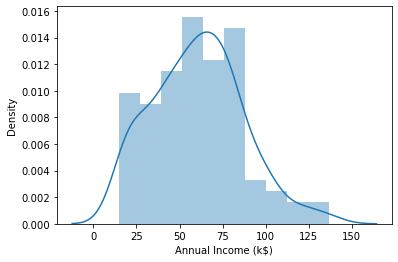

In [35]:
sns.distplot(df['Annual Income (k$)']);

In [36]:
df.columns 

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

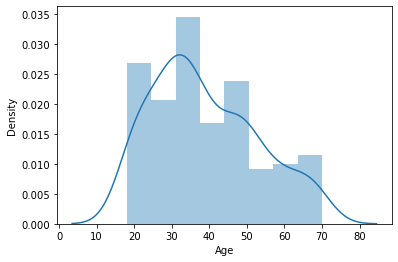

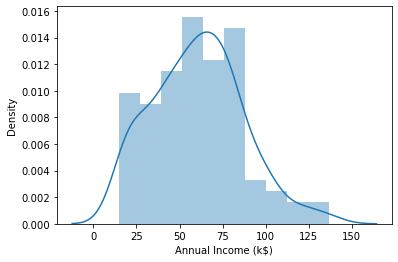

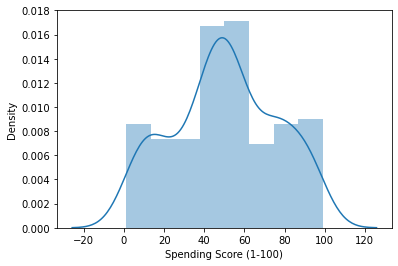

In [38]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

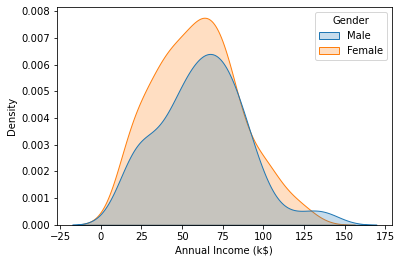

In [39]:
sns.kdeplot(df['Annual Income (k$)'],shade =True, hue = df['Gender']);


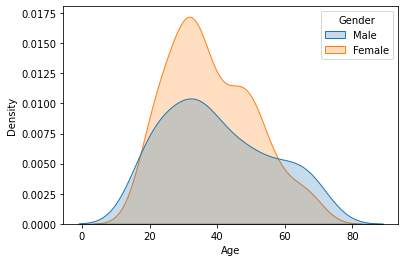

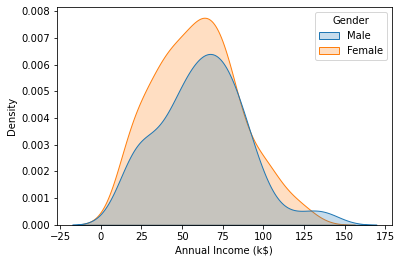

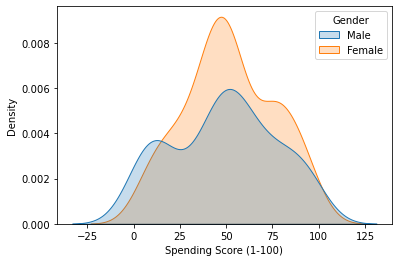

In [40]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade =True, hue = df['Gender']);

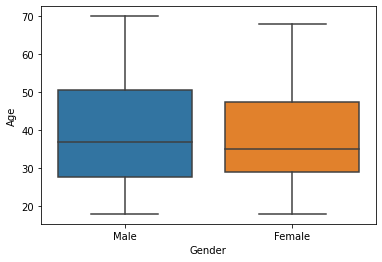

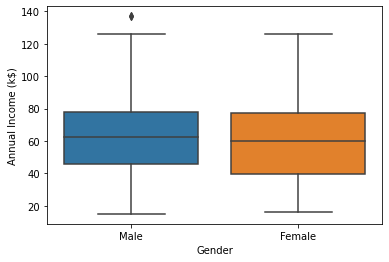

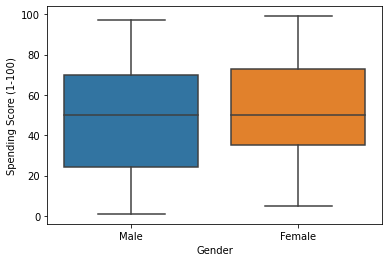

In [41]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df , x = 'Gender', y= df[i]);

In [42]:
df['Gender'].value_counts(normalize = True)  # in percentage

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

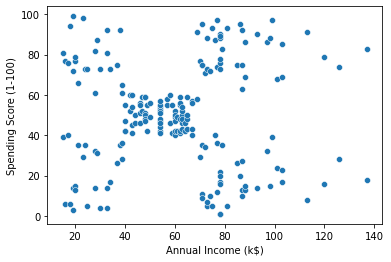

In [43]:
sns.scatterplot(data = df , x = 'Annual Income (k$)', y = 'Spending Score (1-100)');

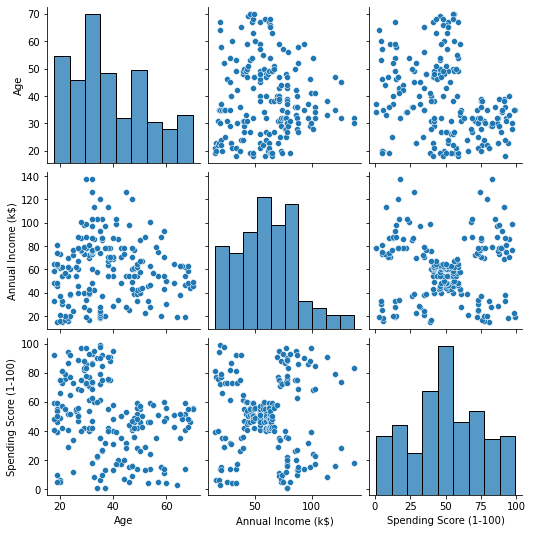

In [44]:
# Pair Plot

sns.pairplot(df);

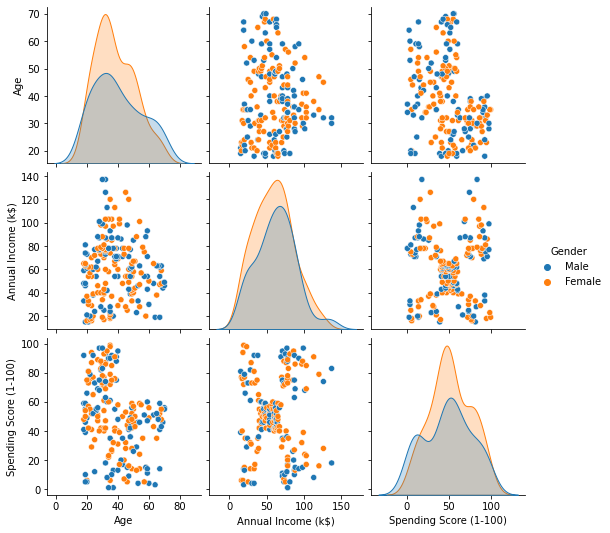

In [45]:
#df = df.drop('CustomerID',axis = 1)
sns.pairplot(df, hue = 'Gender' );

In [46]:
# Mean Values

df.groupby(['Gender'])['Age',  'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [47]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


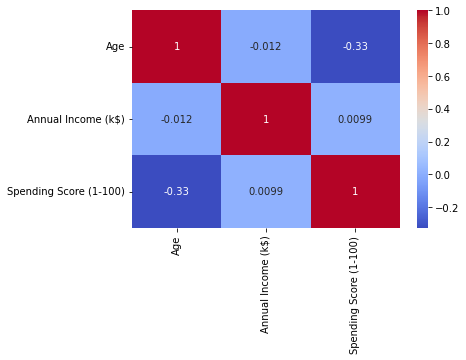

In [48]:
# Heat Map

sns.heatmap(df.corr(),annot = True, cmap= 'coolwarm');

# Clustering : Univariate , Bivariate , Multivariate

In [49]:
clustering1 = KMeans(n_clusters=3)

In [52]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [51]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [60]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


## Summary Statistics

In [62]:

df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [64]:
clustering1.inertia_

# Inertia represents the distance between the centroids. We want it to be relatively low number.

23517.330930930926

In [65]:
 inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [66]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8667.679614837509,
 5081.484660267269,
 3941.4163614163617,
 2831.2960317460324,
 2168.4787157287155,
 1758.812049062049]

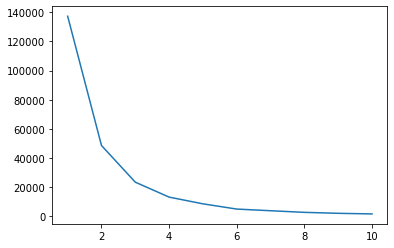

In [67]:
plt.plot(range(1,11),inertia_scores); 
#(Elbow method, here it starts near 3 , so we take number of clusters as 3)

In [68]:
# Mean value for the clusters.
# Univariate cluster

df.groupby('Income Cluster')['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [ ]:
# Bivariate Cluster

In [69]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,1
2,Female,20,16,6,0,3
3,Female,23,16,77,0,1
4,Female,31,17,40,0,3


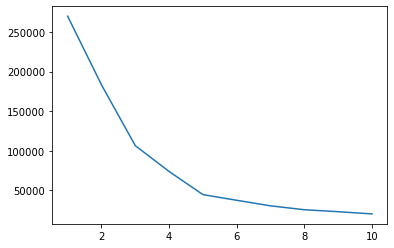

In [92]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    
    inertia_scores2.append(kmeans2.inertia_)
    
plt.plot( range(1,11), inertia_scores2);

# here the elbow seems be to near 5.

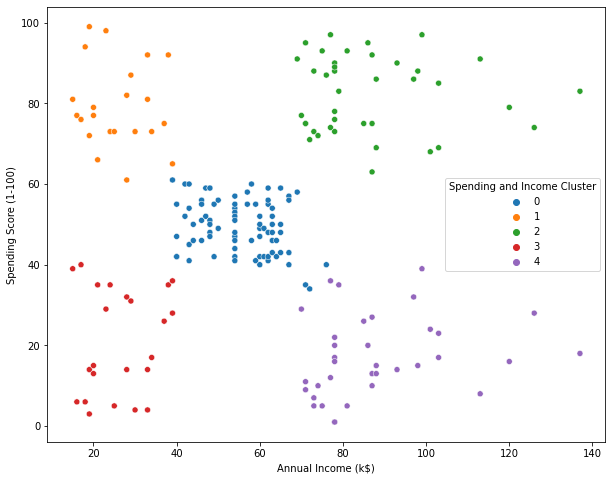

In [73]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue= 'Spending and Income Cluster',palette='tab10');

In [74]:
# Cluster Centers

centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

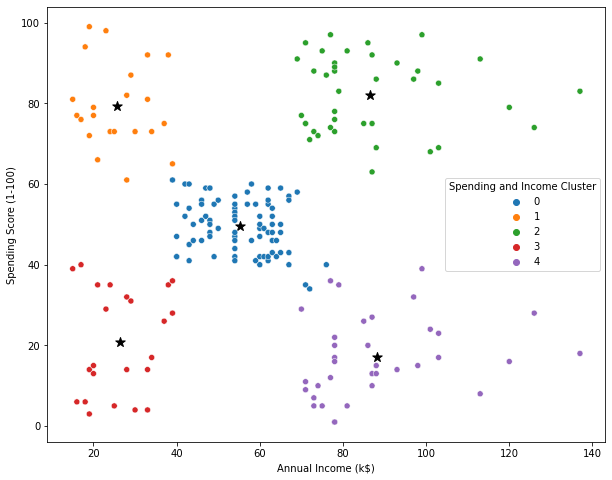

In [75]:
plt.figure(figsize= (10,8))
plt.scatter(x=centers['x'] , y=centers['y'], s= 100, c='black',marker = '*')
sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)', hue= 'Spending and Income Cluster',palette ='tab10')
plt.savefig('clustering_bivariate.png');

In [76]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


In [48]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [77]:
# Multivariate Clustering

from sklearn.preprocessing import StandardScaler

In [78]:
scale = StandardScaler()

In [79]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,1
2,Female,20,16,6,0,3
3,Female,23,16,77,0,1
4,Female,31,17,40,0,3


In [80]:
# Converting the categorical data(gender) to numerical data.

dff = pd.get_dummies(df, drop_first = True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,3,1
1,21,15,81,0,1,1
2,20,16,6,0,3,0
3,23,16,77,0,1,0
4,31,17,40,0,3,0


In [81]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [82]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [83]:
# Scaling the data

dff = scale.fit_transform(dff)

In [84]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


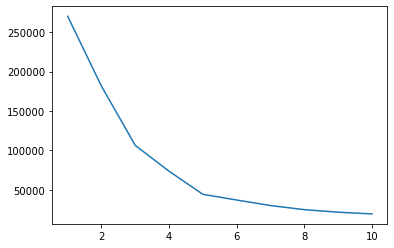

In [83]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    
    kmeans3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    
    inertia_scores3.append(kmeans3.inertia_)
    
plt.plot( range(1,11), inertia_scores3);

In [86]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,1
2,Female,20,16,6,0,3
3,Female,23,16,77,0,1
4,Female,31,17,40,0,3
...,...,...,...,...,...,...
195,Female,35,120,79,2,2
196,Female,45,126,28,2,4
197,Male,32,126,74,2,2
198,Male,32,137,18,2,4


In [85]:
df.to_csv('Clustering.csv')

# Analysis
- Target group would be cluster 2, which has a high Spending Score and high income.
- 54% of cluster 2 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster.
- Cluster 1 presents an interesting opportunity to market to the customers for sales event on popular items.